# EnerjiSA & Patika Veri Bilimi ve Analitiği Bootcamp
## Ödev 1, 07.10.2021


Proje Sahibi: Aleyna ER

### _Q1: Pandas kütüphanesiyle bir DataFrame oluşturup ve içine Levels of Measurements'ları nominal, ordinal, interval ve ratio olan kolonlar ekleyelim._



In [1]:
import pandas as pd
import numpy as np

data = [("Ayşe Çelik",60000,"Doktora", 500),
        ("Ali Yılmaz", 25000, "Lise",670),
        ("Kerim Korkmaz",50000, "Yüksek Lisans",550),
        ("Pelin Demir",38000, "Ön Lisans",515),
        ("Metin Gençtürk", 45000, "Lisans", 380),
        ("Ahmet Genç",15000,"İlkokul",310)]
df = pd.DataFrame(data, columns = ["Name","Salary","Level_of_edu","Credit_score"])
df

# credit score values can vary between 300-850

,Name,Salary,Level_of_edu,Credit_score
0,Ayşe Çelik,60000,Doktora,500
1,Ali Yılmaz,25000,Lise,670
2,Kerim Korkmaz,50000,Yüksek Lisans,550
3,Pelin Demir,38000,Ön Lisans,515
4,Metin Gençtürk,45000,Lisans,380
5,Ahmet Genç,15000,İlkokul,310


In [2]:
from sklearn import preprocessing

label_enc = preprocessing.LabelEncoder()

names = df["Name"].values
names = label_enc.fit_transform(names)
names # name nominal tipte bir değer

array([2, 1, 3, 5, 4, 0])

In [3]:
education = df["Level_of_edu"].values
mapper = {"İlkokul":0, "Lise":1,"Ön Lisans":2,"Lisans":3,"Yüksek Lisans":4,"Doktora":5}
mapper.keys()
education

array(['Doktora', 'Lise', 'Yüksek Lisans', 'Ön Lisans', 'Lisans',
       'İlkokul'], dtype=object)

In [4]:
edu_mapped = df["Level_of_edu"].replace(mapper)
edu_mapped # eğitim kolonuna ordinal özellik katmış olduk

0    5
1    1
2    4
3    2
4    3
5    0
Name: Level_of_edu, dtype: int64

In [5]:
df["mapped name"] = names
df["mapped education"] = edu_mapped
df

,Name,Salary,Level_of_edu,Credit_score,mapped name,mapped education
0,Ayşe Çelik,60000,Doktora,500,2,5
1,Ali Yılmaz,25000,Lise,670,1,1
2,Kerim Korkmaz,50000,Yüksek Lisans,550,3,4
3,Pelin Demir,38000,Ön Lisans,515,5,2
4,Metin Gençtürk,45000,Lisans,380,4,3
5,Ahmet Genç,15000,İlkokul,310,0,0


In [6]:
x = df["Salary"].values
x #ratio veriyi int64 olarak bırakabiliriz

array([60000, 25000, 50000, 38000, 45000, 15000], dtype=int64)

In [7]:
# credit score interval bir değer, aldığı değerleri aralıklara bölerek temsil edebiliriz

df["credit_mapped"] = ''
for i in range(len(df)):
    value = df["Credit_score"].values[i]
    if(value > 850 or value < 300):
        df["credit_mapped"].values[i] = None
    elif(value > 300 and value < 500):
        df["credit_mapped"].values[i] = "C"
    elif(value > 500 and value < 700):
        df["credit_mapped"].values[i] = "B"
    else:
        df["credit_mapped"].values[i] = "A"
    #print(value)
df

,Name,Salary,Level_of_edu,Credit_score,mapped name,mapped education,credit_mapped
0,Ayşe Çelik,60000,Doktora,500,2,5,A
1,Ali Yılmaz,25000,Lise,670,1,1,B
2,Kerim Korkmaz,50000,Yüksek Lisans,550,3,4,B
3,Pelin Demir,38000,Ön Lisans,515,5,2,B
4,Metin Gençtürk,45000,Lisans,380,4,3,C
5,Ahmet Genç,15000,İlkokul,310,0,0,C


### _Q2: Ekli data üzerindeki aşağıda yer alan kolonların count, mean, std, min, 25%, 50%, 75%, max değerlerini ve IQR metoduyla outlier kalan veri sayısını çıkartıp, bu değerleri sözel ve karşılaştırmalı olarak yorumlayalım._

In [8]:
adr = r"C:\Users\Asus\Downloads\data.csv"
data = pd.read_csv(adr)
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [9]:
df_filter = ["radius_mean", "area_mean", "compactness_mean"]
filtered_data = data[df_filter]
filtered_data.describe()

,radius_mean,area_mean,compactness_mean
count,569.000000,569.000000,569.000000
mean,14.127292,654.889104,0.104341
std,3.524049,351.914129,0.052813
min,6.981000,143.500000,0.019380
25%,11.700000,420.300000,0.064920
50%,13.370000,551.100000,0.092630
75%,15.780000,782.700000,0.130400
max,28.110000,2501.000000,0.345400


In [10]:
from scipy.stats import iqr

r_iqr = iqr(filtered_data["radius_mean"])
r_iqr

4.08

In [11]:
radius = np.array(filtered_data["radius_mean"])
r_q1 = np.percentile(radius,25)
r_q1

11.7

In [12]:
r_q3 = np.percentile(radius,75)
r_q3

15.78

In [13]:
n_rIQR = r_q3 - r_q1
n_rIQR # hazır fonk kullanmak istemezsek böyle de hesaplayabiliriz, sonuç aynı

4.08

In [14]:
r_low = r_q1 - 1.5 * r_iqr
r_high = r_q3 + 1.5 * r_iqr
print("radius_mean inter quartile range from {0} to {1}".format(r_low,r_high)) # 7.61 - 19.86 arası dışındaki değerler outlier dır

radius_mean inter quartile range from 5.579999999999999 to 21.9


In [15]:
#pd.options.display.max_rows = 600

filtered_data["radius_mean"].value_counts().sort_index(ascending=True)


6.981     1
7.691     1
7.729     1
7.760     1
8.196     1
         ..
25.220    1
25.730    1
27.220    1
27.420    1
28.110    1
Name: radius_mean, Length: 456, dtype: int64

In [16]:
r_outliers = []

for i in filtered_data["radius_mean"].values:
    if(i < r_low or i > r_high):
        r_outliers.append(i)

print("number of outlier for radius_mean: " , len(r_outliers))

number of outlier for radius_mean:  14


In [17]:
a_iqr = iqr(filtered_data["area_mean"])

area = np.array(filtered_data["area_mean"])
a_q1 = np.percentile(area,25)
a_q3 = np.percentile(area,75)

a_low = a_q1 - 1.5 * a_iqr
a_high = a_q3 + 1.5 * a_iqr

print("area_mean inter quartile range from {0} to {1}".format(a_low,a_high))

area_mean inter quartile range from -123.30000000000001 to 1326.3000000000002


In [18]:
filtered_data["area_mean"].value_counts().sort_index(ascending=True)

143.5     1
170.4     1
178.8     1
181.0     1
201.9     1
         ..
1878.0    1
2010.0    1
2250.0    1
2499.0    1
2501.0    1
Name: area_mean, Length: 539, dtype: int64

In [19]:
a_outliers = []

for i in filtered_data["area_mean"].values:
    if(i < a_low or i > a_high):
        a_outliers.append(i)

print("number of outliers for area_mean: " , len(a_outliers))

number of outliers for area_mean:  25


In [20]:
c_iqr = iqr(filtered_data["compactness_mean"])

compactness = np.array(filtered_data["compactness_mean"])
c_q1 = np.percentile(compactness,25)
c_q3 = np.percentile(compactness,75)

c_low = c_q1 - 1.5 * c_iqr
c_high = c_q3 + 1.5 * c_iqr

print("compactness_mean inter quartile range{0} to {1}".format(c_low,c_high))

compactness_mean inter quartile range-0.03329999999999997 to 0.22861999999999996


In [21]:
filtered_data["compactness_mean"].value_counts().sort_index(ascending=True)

0.01938    1
0.02344    1
0.02650    1
0.02675    1
0.03116    1
          ..
0.28320    1
0.28390    1
0.28670    1
0.31140    1
0.34540    1
Name: compactness_mean, Length: 537, dtype: int64

In [22]:
c_outliers = []

for i in filtered_data["compactness_mean"].values:
    if(i < c_low or i > c_high):
        c_outliers.append(i)

print("number of outliers for compactness_mean: " , len(a_outliers))

number of outliers for compactness_mean:  25


### _Q3: Ekli data üzerindeki aşağıda yer alan kolonların birbirleriyle olan korelasyonlarını, covaryanslarını, Pearson Correlation Coefficientlarını, Spearman Rank Coefficientlarını ve Effect Size'larını bularak sözel ve karşılaştırmalı olarak yorumlayalım._


In [23]:
df_corr = filtered_data.corr()
df_corr # tüm veri kayıtları için feature'lerın korelasyonunu gösterir


,radius_mean,area_mean,compactness_mean
radius_mean,1.000000,0.987357,0.506124
area_mean,0.987357,1.000000,0.498502
compactness_mean,0.506124,0.498502,1.000000


Korelasyon değeri -1 ve 1 arasında değerler alır. 1'e yakın değerler pozitif yönde güçlü korelasyonu,
-1'e yakın değerler güçlü negatif korelasyonu gösterir. 0'ya yakın değerler için iki feature arasında korelasyonun zayıf olduğunu/ olmadığını söyleyebiliriz.

In [24]:
bening_data = filtered_data[data["diagnosis"]=="B"]
bening_data

,radius_mean,area_mean,compactness_mean
19,13.540,566.3,0.08129
20,13.080,520.0,0.12700
21,9.504,273.9,0.06492
37,13.030,523.8,0.03766
46,8.196,201.9,0.05943
...,...,...,...
558,14.590,657.1,0.13300
559,11.510,403.5,0.10210
560,14.050,600.4,0.11260
561,11.200,386.0,0.03558


<AxesSubplot:>

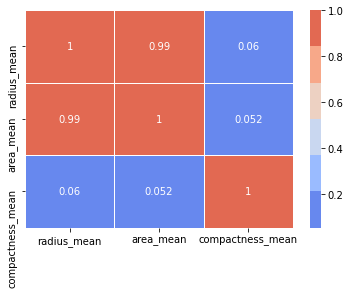

In [25]:
import seaborn as sns

#bening_corr = bening_data.corr()

sns.heatmap(bening_data.corr(), annot = True,  linewidths=.5, cmap=sns.color_palette("coolwarm"))
           

In [26]:
bening_data.corr()

,radius_mean,area_mean,compactness_mean
radius_mean,1.000000,0.994435,0.060442
area_mean,0.994435,1.000000,0.052353
compactness_mean,0.060442,0.052353,1.000000


In [27]:
malign_data = filtered_data[data["diagnosis"]=="M"]
malign_data

,radius_mean,area_mean,compactness_mean
0,17.99,1001.0,0.27760
1,20.57,1326.0,0.07864
2,19.69,1203.0,0.15990
3,11.42,386.1,0.28390
4,20.29,1297.0,0.13280
...,...,...,...
563,20.92,1347.0,0.22360
564,21.56,1479.0,0.11590
565,20.13,1261.0,0.10340
566,16.60,858.1,0.10230


<AxesSubplot:>

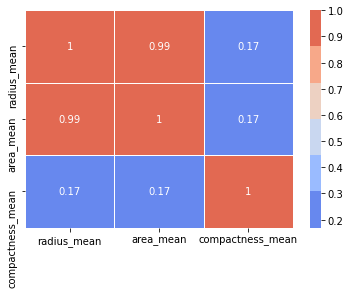

In [28]:
sns.heatmap(malign_data.corr(), annot = True,  linewidths=.5, cmap=sns.color_palette("coolwarm"))

Veriyi hastalık tipi olarak malign ve bening ayırmadığımızda feature'ların korelasyon değerlerinde değişiklik olsa da görüyoruz ki iki seçenek için de radius_mean ve area_mean güçlü pozitif korelasyona sahip.

Malign verilerde compactness_mean ile radius_mean ve  compactness_mean ile area_mean arasındaki korelasyon Bening verilerin arasındakine göre fazla.

Veriye bir bütün olarak baktığımızda feature'lar arasındaki korelasyonun daha yüksek olduğunuz gözlemliyoruz.

#### Veriye bir bütün olarak bakmaya (Bening-Malign ayırmadan) bakmaya devam edersek feature'ların kovaryansları, pearson ve spearman korelasyonları aşağıdaki gibi hesaplanır:


In [29]:
cov = filtered_data.cov()
cov

# feature'lar arası koveryans değerleri hesaplanır

,radius_mean,area_mean,compactness_mean
radius_mean,12.418920,1224.483409,0.094197
area_mean,1224.483409,123843.554318,9.264931
compactness_mean,0.094197,9.264931,0.002789


In [30]:
pearson_cor = filtered_data.corr(method="pearson")
pearson_cor

,radius_mean,area_mean,compactness_mean
radius_mean,1.000000,0.987357,0.506124
area_mean,0.987357,1.000000,0.498502
compactness_mean,0.506124,0.498502,1.000000


In [31]:
from scipy.stats import spearmanr

spearman_rank_coef = spearmanr(filtered_data)
spearman_rank_coef

# korelasyon ve p-value değerleri birlikte verilir

SpearmanrResult(correlation=array([[1.        , 0.99960203, 0.49757761],
       [0.99960203, 1.        , 0.4889884 ],
       [0.49757761, 0.4889884 , 1.        ]]), pvalue=array([[0.00000000e+00, 0.00000000e+00, 6.33492414e-37],
       [0.00000000e+00, 0.00000000e+00, 1.54195152e-35],
       [6.33492414e-37, 1.54195152e-35, 0.00000000e+00]]))

In [32]:
spearman_rank_coef[0] # sadece spearman korelasyonunu görmek istersek

array([[1.        , 0.99960203, 0.49757761],
       [0.99960203, 1.        , 0.4889884 ],
       [0.49757761, 0.4889884 , 1.        ]])

#### Effect size, iki grubun istatiksel olarak farklılığını ölçer.   Bening (kanser olmayan) ve Malign (kötü huylu) tümörler için, feature'ların effect size'larını ölçersek;


In [33]:
import math 

for column in (bening_data.columns):
    mean_diff = (bening_data[column].mean() - malign_data[column].mean())
    nominator  = (len(bening_data)-1) * (bening_data[column].std()**2) + (len(malign_data)-1) * (malign_data[column].std()**2)
    denominator = len(bening_data) + len(malign_data) - 2
    std_pooled = math.sqrt(nominator/denominator)
    effect_size = mean_diff/std_pooled
    print("{0} feature'ının etki büyüklüğü : ".format(column), effect_size)

radius_mean feature'ının etki büyüklüğü :  -2.2054634515707545
area_mean feature'ının etki büyüklüğü :  -2.0756514409593456
compactness_mean feature'ının etki büyüklüğü :  -1.5345742415951857



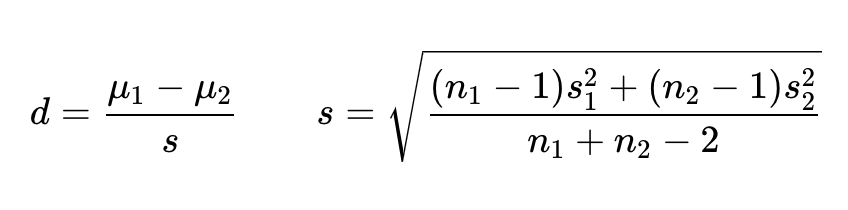

                                                Şekil. Cohen's d effect size formula

Bening ve Malign verilerindeki feature değerlerinin birbirinden büyük oranda farklı olduğunu yorumlayabiliriz.

In [34]:
filter2 = ["area_mean","diagnosis"]
vis = data[filter2]
vis

,area_mean,diagnosis
0,1001.0,M
1,1326.0,M
2,1203.0,M
3,386.1,M
4,1297.0,M
...,...,...
564,1479.0,M
565,1261.0,M
566,858.1,M
567,1265.0,M


<AxesSubplot:xlabel='area_mean', ylabel='Count'>

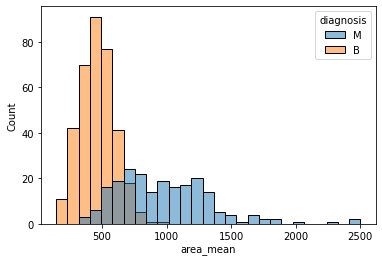

In [35]:
sns.histplot(vis, x = vis["area_mean"],hue = "diagnosis")

#### İyi (Bening) ve kötü (Malign) huylu tümörlerin area_mean değerleri yukarıdaki gibi dağılım sergilemektedir. Görselde görülmektedir ki, iki tümör çeşidindeki area_mean değeri birbirinden oldukça farklıdır.

### _Q4 : Bayes Teoreminin gerçek hayatta karşımıza çıkan ve kullanılan örneklerinden 5 tane bulalım._

- [Su kirliliği ve kalitesi problemlerinde](https://www.accessscience.com/content/applications-of-bayes-theorem-for-predicting-environmental-damage/YB100249)
- [biyolojik örneklerin analizi (drug screening)](https://towardsdatascience.com/bayes-rule-with-a-simple-and-practical-example-2bce3d0f4ad0)
- [Kanser testleri (mamograf)](https://www.statisticshowto.com/probability-and-statistics/probability-main-index/bayes-theorem-problems/)
- [Depresyon testlerinin performans değerlendirmesi](https://www.frontiersin.org/articles/10.3389/fpsyg.2018.01240/full)
- [Arkadaş/partner seçimi](https://blogs.cornell.edu/info2040/2018/11/19/bayes-theorem-application-in-everyday-life/)




### _Q5: Poisson, Normal , Gamma, Weilbull ve Logaritmik dağılımların benzer ve farklı yönlerini bir tablo halinde çıkaralım._

-  Poisson dağılımı, bir belgedeki dakika başına telefon görüşmesi sayısı veya sayfa başına hata sayısı gibi belirli bir aralıkta bir olayın meydana gelme sayısını tanımlar.
Poisson dağılımının altında yatan üç koşul şunlardır:
    - Herhangi bir aralıktaki olası oluşumların sayısı sınırsızdır. 
    - Olaylar bağımsızdır. Bir aralıktaki oluşum sayısı, diğer aralıklardaki oluşum sayısını etkilemez.
    - Ortalama oluşum sayısı aralıktan aralığa aynı kalmalıdır.
  - Parametreleri:  λ the rate (mean)

- Normal dağılım, insanların IQ'ları veya boyları gibi birçok doğal fenomeni tanımladığı için olasılık teorisindeki 
en önemli dağılımdır. Karar vericiler, enflasyon oranı veya gelecekteki benzin fiyatı gibi belirsiz değişkenleri 
tanımlamak için normal dağılımı kullanabilir.
Normal dağılımın altında yatan üç koşul şunlardır:

    - Belirsiz değişkenin bazı değerleri en olası olanıdır (dağılımın ortalaması).
    - Belirsiz değişken, ortalamanın altında olabileceği kadar ortalamanın üzerinde de olabilir (ortalama hakkında simetrik).
    - Belirsiz değişkenin, ortalamanın yakınında olması daha uzak olmaktan daha olasıdır.
        - Parametreleri: mean(ortalama), std (standart sapma)

- Gamma dağılımı, çok çeşitli fiziksel nicelikler için geçerlidir ve diğer dağılımlarla ilişkilidir: lognormal, üstel, Pascal, Erlang, Poisson ve ki-kare. Kirletici konsantrasyonlarını ve yağış miktarlarını temsil etmek için meteorolojik süreçlerde kullanılır. Gama dağılımı, olay süreci tamamen rastgele olmadığında, olayların meydana gelmesi arasındaki süreyi ölçmek için de kullanılır.
Gama dağılımının diğer uygulamaları, envanter kontrolü, ekonomik teori ve sigorta risk teorisini içerir. Gama dağılımı, çoğunlukla bir Poisson sürecinde bir olayın r. meydana gelmesine kadar geçen sürenin dağılımı olarak kullanılır. Bu şekilde kullanıldığında, gama dağılımının altında yatan üç koşul şunlardır:
    - Herhangi bir ölçü birimindeki olası oluşumların sayısı sabit bir sayı ile sınırlı değildir.
    - Olaylar bağımsızdır. Bir ölçü birimindeki olay sayısı, diğer birimlerdeki olay sayısını etkilemez.
    - Ortalama oluşum sayısı birimden birime aynı kalmalıdır.
        -  Parametreleri: α = rate parameter, β scale parameter.

- Weibull dağılımı, ömür ve yorulma testlerinden elde edilen verileri tanımlar. Güvenilirlik (reliability) çalışmalarında hata süresini ve güvenilirlik ve kalite kontrol testlerinde malzemelerin kırılma mukavemetlerini tanımlamak için yaygın olarak kullanılır. Weibull dağılımları, rüzgar hızı gibi çeşitli fiziksel nicelikleri temsil etmek için de kullanılır.
Weibull dağılımı, diğer birçok dağılımın özelliklerini üstlenebilen bir dağılım ailesidir. Örneğin, tanımladığınız şekil parametresine bağlı olarak, diğerlerinin yanı sıra üstel ve Rayleigh dağılımlarını modellemek için Weibull dağılımı kullanılabilir. Weibull dağılımı çok esnektir. Weibull şekil parametresi 1.0'a eşit olduğunda, Weibull dağılımı üstel dağılımla aynıdır.
Weibull konum parametresi, 0.0'dan farklı bir konumdan başlamak için bir üstel dağılım ayarlamanıza olanak tanır. Şekil parametresi 1.0'dan küçük olduğunda, Weibull dağılımı hızla azalan bir eğri haline gelir. Bir üretici, bu etkiyi, bir yanma periyodu sırasında parça arızalarını tanımlamada faydalı bulabilir.
        - Parametreleri:  α = rate parameter,  β = scale parameter

- Lognormal (logaritmik) dağılım, değerlerin pozitif olarak çarpık olduğu durumlarda, örneğin menkul kıymet değerlemesi için finansal analizde veya mülk değerlemesi için gayrimenkulde ve değerlerin sıfırın altına düşemeyeceği durumlarda yaygın olarak kullanılır.
Hisse senedi fiyatları, normal (simetrik) dağılımdan ziyade genellikle pozitif çarpıktır. Hisse senedi fiyatları bu eğilimi sergilemektedir çünkü sıfırın alt sınırının altına düşemezler, ancak sınırsız herhangi bir fiyata yükselebilirler. Benzer şekilde, gayrimenkul fiyatları pozitif çarpıklık gösterir ve mülk değerleri olarak lognormal olarak dağılır.
olumsuz olamaz.
Lognormal dağılımın altında yatan üç koşul şunlardır:
    - Belirsiz değişken sınırsız olarak artabilir ancak sıfırın altına düşemez.
    - Belirsiz değişken, değerlerin çoğu alt sınıra yakın olacak şekilde pozitif olarak çarpıktır.
    - Belirsiz değişkenin doğal logaritması normal bir dağılım verir.
        - Parametreleri:  μ = location parameter, σ = scale parameter.
       

> kaynaklar: [1](https://onlinelibrary.wiley.com/doi/pdf/10.1002/9781119197096.app03), [2](https://www.causeweb.org/cause/archive/repository/statjava/Distributions.html#LOGNORMAL), [3](https://corporatefinanceinstitute.com/resources/knowledge/other/normal-distribution/)